In [63]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [64]:
try:
    data = np.loadtxt('/Users/chaitanyagupta/Desktop/machine-learning/Logistic_Regression/ex2/ex2data1.txt', delimiter=',')
except:
    data = np.loadtxt('/home/chaitanya/Desktop/machine-learning/Logistic_Regression/ex2/ex2data1.txt', delimiter=',')

x = data[:, :-1]

y = data[:, -1:]

pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

m, n = x.shape[0], x.shape[1]
    

x0 = np.ones(m)

X = np.c_[x0, x]

### Plotting the data

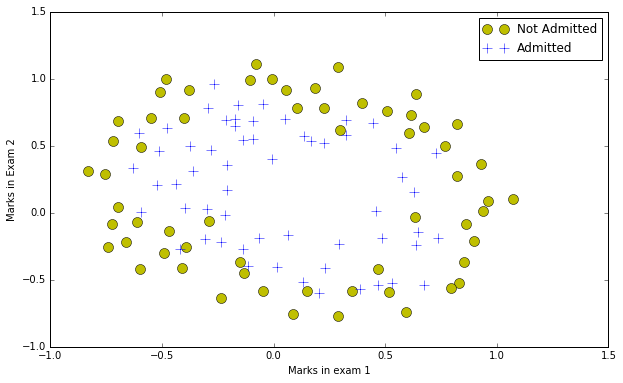

In [118]:
def plotData():
    plt.figure(figsize=(10,6))

    plt.plot(neg[:, 0],neg[:, 1], 'yo', markersize=10, label = "Not Admitted")
    plt.plot(pos[:, 0], pos[:, 1], 'b+', markersize=10, label = "Admitted")

    plt.ylabel('Marks in Exam 2')
    plt.xlabel('Marks in exam 1')
    plt.legend()
    
plotData()

In [66]:
# Sigmoid Function
def g(z):
    return (1 / (1 + np.exp(-z)))

# Cost Function
def J(theta, X, y):
    
    hypothesis  = g(np.dot(X, theta))
    
#     print("lol")
#     print(hypothesis.shape)
    
    error = -1 *(1/m) * (np.dot(np.log(hypothesis).T, y)+ np.dot(np.log(1-hypothesis).T, (1-y)))

    return error

# Gradient Function
def gradient(theta, X, y):
    '''Gradient of log likelehood function'''
    hypo = g(np.dot(X, theta))
    
    grad =  (1/m) * np.dot(X.T, (np.reshape(hypo, (hypo.size, 1)) - y ))
    
    return grad

In [76]:
theta = np.zeros(n + 1)

l_rate = 0.01

iters = 400

Jn = J(theta, X, y)

print("Initial Error: ", Jn)


Initial Error:  [0.69314718]


In [68]:

#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"#An alt 
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(theta, X, y):
    result = optimize.fmin(J, x0=theta, args=(X, y), maxiter=400, full_output=True)
    
    return result[0], result[1]

In [69]:

theta,  mincost  =  optimizeTheta(theta,X,y)
#That's pretty cool. Black boxes ftw

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [70]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."

print(J(theta, X, y))

[0.2034977]


In [71]:
#Plotting the decision boundary: two points, draw a line between#Plottin 
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)


def plotDecisionBoundary(theta, X, y):
        
    plt.figure(figsize=(10,6))

    plt.plot(neg[:, 0],neg[:, 1], 'yo', markersize=10, label = "Not Admitted")
    plt.plot(pos[:, 0], pos[:, 1], 'b+', markersize=10, label = "Admitted")
    
    x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
                           
    y_boundary = (-1 / theta[2]) * (theta[0] + theta[1] * x_boundary)
    
    plt.plot(x_boundary, y_boundary, 'r-', label = "Decision Boundary")
    
    plt.ylabel('Marks in Exam 2')
    plt.xlabel('Marks in exam 1')
    plt.legend()

        

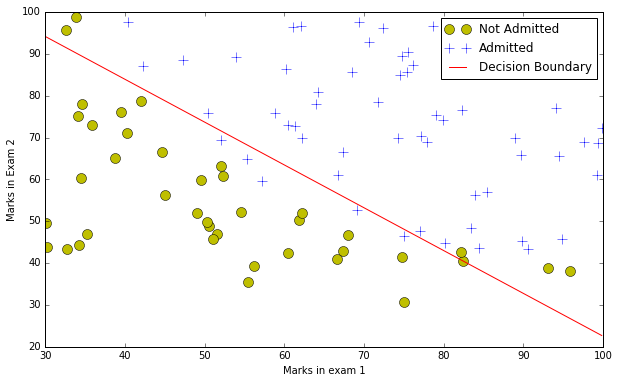

In [72]:
plotDecisionBoundary(theta, X, y)

In [73]:

#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, #For a s 
#you should expect to see an admission probability of 0.776.
print(g(theta[0] + theta[1]* 45 + theta[2] * 85))

0.7762915904112411


In [74]:

def makePrediction(mytheta, myx):
    return g(np.dot(myx, mytheta)) >= 0.5

In [75]:
pos_0 = np.ones(pos.shape[0])
neg_0 = np.ones(neg.shape[0])

print(pos.shape)
print(pos_0.shape)

pos = np.c_[pos_0, pos]
neg = np.c_[neg_0, neg]

print(pos.shape)

#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta, pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta, neg))))

tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot

print("Fraction of training samples correctly predicted: %f." % prcnt_correct)

(60, 2)
(60,)
(60, 3)
Fraction of training samples correctly predicted: 0.890000.


### Regularized Logistic Regression

In [155]:
try:
    data = np.loadtxt('/Users/chaitanyagupta/Desktop/machine-learning/Logistic_Regression/ex2/ex2data2.txt', delimiter=',')
except:
    data = np.loadtxt('/home/chaitanya/Desktop/machine-learning/Logistic_Regression/ex2/ex2data2.txt', delimiter=',')

x = data[:, :-1]

y = data[:, -1:]

pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

m, n = x.shape[0], x.shape[1]
    

x0 = np.ones(m)

X = np.c_[x0, x]

### PLotting the data

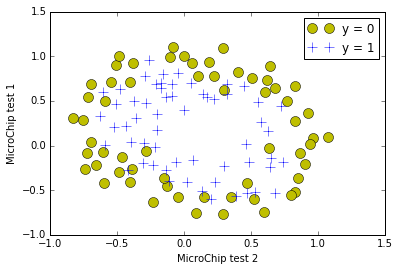

In [165]:
def plotData():


    plt.plot(neg[:, 0],neg[:, 1], 'yo', markersize=10, label = "y = 0")
    plt.plot(pos[:, 0], pos[:, 1], 'b+', markersize=10, label = "y = 1")

    plt.ylabel('MicroChip test 1')
    plt.xlabel('MicroChip test 2')
    plt.legend()
    
plotData()

### Feature Mapping

In [166]:

#This code I took from someone else (the OCTAVE equivalent was provided in the HW)#This co 
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n - x1's, a column of n - x2's, and builds
    a n - x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [167]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

### Cost function and gradient

In [168]:
# Sigmoid Function
def g(z):
    return (1 / (1 + np.exp(-z)))


# Cost Function
def J(theta, X, y, lambdaa):
    
    hypothesis  = g(np.dot(X, theta))
    
    error = -1 *(1/m) * (np.dot(np.log(hypothesis).T, y)+ np.dot(np.log(1-hypothesis).T, (1-y))) + (lambdaa / (2 * m)) * np.sum(theta[1:] ** 2)

    return error

# Gradient Function
def gradient(theta, X, y):
    '''Gradient of log likelehood function'''
    hypo = g(np.dot(X, theta))
    
    
    theta[0] -= l_rate * (1/m) * np.dot((hypo - y), X)
    
    theta[1:] -= (l_rate/m) * (np.dot((hypo - y), X) + lambdaa * (theta[1:])) 
        
#     grad =  (1/m) * np.dot(X.T, (np.reshape(hypo, (hypo.size, 1)) - y ))
    
    return grad

In [169]:

#Cost function is the same as the one implemented above, as I included the regularization#Cost fu 
#toggled off for default function call (lambda = 0)
#I do not need separate implementation of the derivative term of the cost function
#Because the scipy optimization function I'm using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values

theta = np.zeros((mappedX.shape[1],1))
J(theta,mappedX,y, lambdaa = 1)

array([[0.69314718]])

### Learning parameters using fminunc

In [170]:

def optimizeRegularizedTheta(theta,X,y,mylambda=1.):
    result = optimize.minimize(J, theta, args=(X, y, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(theta,mappedX,y)

### PLotting the decision boundary

In [175]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    
    print(mincost)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

0.254364765204496


/home/chaitanya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/chaitanya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


[0.52900274]
0.6482157024203546
0.6864838340539919


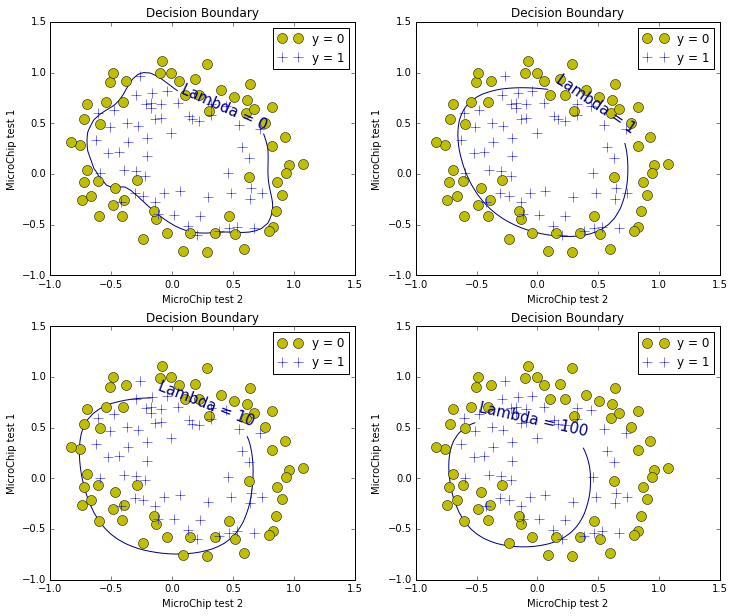

In [176]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)